In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [6]:
df_feat.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [7]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

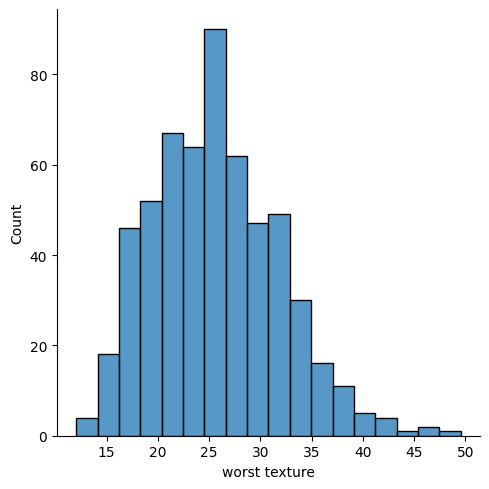

In [8]:
sns.displot(df_feat['worst texture'])

<Axes: >

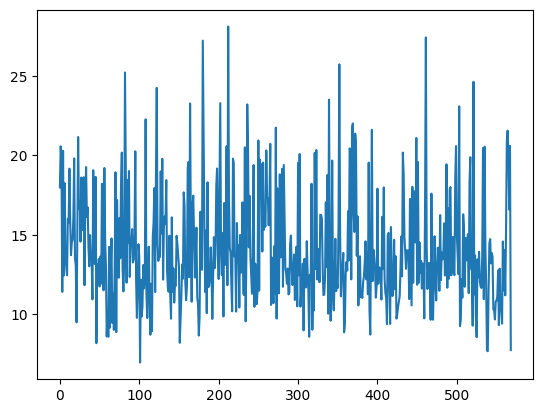

In [9]:
df_feat['mean radius'].plot()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X= df_feat
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.svm import SVC

In [13]:
model = SVC()

In [14]:
model.fit(X_train,y_train) 

SVC()

In [15]:
 predictions = model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
print(confusion_matrix(y_test,predictions))

[[ 56  10]
 [  3 102]]


In [18]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



The previous example was done without using the Grid Search. The grid search is used to systematically search for the best combinator of regularization parameters and gamma 

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [21]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [22]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [23]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [24]:
grid.best_estimator_

SVC(C=1, gamma=0.0001)

In [25]:
grid_predictions = grid.predict(X_test)

In [26]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

